# Book_<파이썬 Jupyter Notebook 실전 입문>_#3장_Pandas 데이터 처리

#### 출판사 '터닝포인트'
#### 이케우치 타카히로, 카타야나기 노부코, 이와오 엠마 하루카, @driller 지음

#### 판다스(Pandas)란?
    레이블이 부여된 데이터를 쉽고 직관적으로 취급할 수 있도록 설계된 Python 서드파티 패키지
    Pandas의 두 가지 주요 데이터구조인 1) Series(1차원 데이터)와 2)DataFrame(2차원 데이터)은 금융, 통계 사회과학 등 많은 분야의 데이터 처리에 적합하다.

## 3-2 Sample Data 설명

In [1]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_csv = os.path.join(base_url, 'anime_split_genre.csv')

pd.read_csv(anime_csv).head()

,anime_id,name,genre,type,episodes,rating,members
0,20707,"""0""",Music,Music,1,5.06,1170
1,25627,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",Kids,Movie,1,5.00,113
2,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Comedy,OVA,1,7.06,14351
3,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",School,OVA,1,7.06,14351
4,7669,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",Fantasy,OVA,1,7.06,14351


In [2]:
anime_csv = os.path.join(base_url, 'anime_stock_price.csv')
pd.read_csv(anime_csv, index_col=0, parse_dates=['Date']).head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,3356.86,1201.51
2015-01-02,3356.86,1201.51
2015-01-05,3396.12,1218.44
2015-01-06,3361.77,1201.51
2015-01-07,3297.97,1202.51


In [3]:
anime_csv = os.path.join(base_url, '4816.csv')
pd.read_csv(anime_csv, index_col=0, parse_dates=['Date']).head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1600.0,1600.0,1580.0,1597.0,5600.0
2010-01-05,1597.0,1605.0,1590.0,1600.0,14800.0
2010-01-06,1600.0,1602.0,1579.0,1601.0,8300.0
2010-01-07,1600.0,1600.0,1590.0,1595.0,3700.0
2010-01-08,1599.0,1601.0,1595.0,1600.0,32300.0


## 3-3 Series

    #특징
    index(label)를 가지는 1차원 데이터
    index는 중복 가능
    lable 또는 데이터 위치를 지정한 추출 가능. 
    index 슬라이스 가능
    산술 연산 가능. 통계량 산출 가능.
    
    #제1인수
    - list
    - tuple
    - dictionary
    - numpy.ndarray
    
    #ex
    index | values
    index | values
    index | values
    ..

In [4]:
# index 지정할 경우
import pandas as pd

ser = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [5]:
# index 생략할 경우
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [6]:
# Series.loc : lable(index) 사용해서 데이터 선택하기

ser.loc['b']

2

In [7]:
# loc 생략해서 데이터 선택하기
ser['b']

2

In [8]:
# label 범위 지정해서 데이터 선택하기
ser.loc['b':'c']

b    2
c    3
dtype: int64

In [9]:
# 복수 요소 지정
ser.loc[['a', 'c']] #list

a    1
c    3
dtype: int64

In [10]:
#Series.iloc : 데이터 위치를 정수값으로 지정해 데이터 선택

ser.iloc[1]
ser.iloc[1:3]


b    2
c    3
dtype: int64

In [11]:
# 논리값 지정해 데이터 선택
ser.loc[[True, False, True]]

a    1
c    3
dtype: int64

In [12]:
# Series에 대한 비교 연산
ser != 2

a     True
b    False
c     True
dtype: bool

In [13]:
# 비교 연산 이용한 데이터 추출
ser[ser !=2]

a    1
c    3
dtype: int64

## 3-4 DataFrame

    DataFrame은 행과 열에 레이블을 가진 2차원 데이터.
    
    #인수
    - 1차원 또는 2차원 데이터

In [14]:
# basic code

df = pd.DataFrame([[1, 10, 100], [2, 20, 200], [3, 30, 300]],
                 index=['r1', 'r2', 'r3'],
                 columns=['c1', 'c2', 'c3'])
df

,c1,c2,c3
r1,1,10,100
r2,2,20,200
r3,3,30,300


In [15]:
# label 사용해서 데이터 선택
df.loc['r2', 'c2']

20

In [16]:
# 모든 행(열) 지정하는 경우 - [:]
df.loc['r2',:]

c1      2
c2     20
c3    200
Name: r2, dtype: int64

In [17]:
df.loc[:, 'c2']

r1    10
r2    20
r3    30
Name: c2, dtype: int64

In [18]:
# 슬라이스 또는 리스트 넘겨주기
df.loc[['r1', 'r3'], 'c2':'c3']

,c2,c3
r1,10,100
r3,30,300


In [19]:
# iloc 활용해 데이터 선택 
# * iloc : Purely integer-location based indexing for selection by position.

df.iloc[1:3, [0, 2]]

,c1,c3
r2,2,200
r3,3,300


In [20]:
# 열 이름 지정해서 데이터 선택
df['c2']

r1    10
r2    20
r3    30
Name: c2, dtype: int64

In [21]:
# 논리값 사용해 데이터 선택
df > 10

,c1,c2,c3
r1,False,False,True
r2,False,True,True
r3,False,True,True


In [22]:
# c2열의 값이 10보다 큰 데이터

df.loc[df['c2'] >10]

,c1,c2,c3
r2,2,20,200
r3,3,30,300


In [23]:
df

,c1,c2,c3
r1,1,10,100
r2,2,20,200
r3,3,30,300


## 3-5 다양한 데이터 불러오기

    Pandas는 다양한 형식의 데이터를 불러올 수 있음.
    - CSV
    - Excel
    - Database
    - JSON
    - MessagePack
    - HTML
    - Google BigQuery
    - Clipboard
    - Pickle
    - etc

#### CSV 파일 불러오기

In [24]:
import os
import_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_csv = os.path.join(base_url, 'anime.csv')

df = pd.read_csv(anime_csv).head()
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [25]:
# 인덱스 열 이름 지정
df = pd.read_csv(anime_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [26]:
# 열의 형식 변경
df = pd.read_csv(anime_csv, dtype={'members': float})
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266.0


In [27]:
# datetime 형의 열이 포함된 경우
anime_stock_price_csv = os.path.join(base_url, 'anime_stock_price.csv')
df = pd.read_csv(anime_stock_price_csv, parse_dates=['Date'])
df.dtypes

Date              datetime64[ns]
TOEI ANIMATION           float64
IG Port                  float64
dtype: object

In [28]:
# 단락 문자 변경
anime_tsv = os.path.join(base_url, 'anime.tsv')
df = pd.read_csv(anime_tsv, sep='\t')

#### Excel 파일 불러오기

In [29]:
# basic code

anime_xlsx = os.path.join(base_url, 'anime.xlsx')
df = pd.read_excel(anime_xlsx)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
2,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
3,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
4,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193


In [30]:
# 특정 시트 불러오기
df = pd.read_excel(anime_xlsx, sheetname='Movie')

TypeError: read_excel() got an unexpected keyword argument 'sheetname'

#### SQL 사용해 불러오기

    pandas.read_sql()
    제1인수 : 쿼리를 실행하는 SQL문
    제2인수 : SQLAlchemy or DBAPI2의 접속 인스턴스 넘겨줌

In [ ]:
from urllib.request import urlopen
import sqlite3

anime_db = os.path.join(base_url, 'anime.db')
res = urlopen(anime_db)
with open('anime.db', 'wb') as f:
    f.write(res.read())
    with sqlite3.connect(f.name) as conn:
        df = pd.read_sql('SELECT * FROM anime', conn)

#### HTML 파일 불러오기

    HTML 파일의 table 요소를 DataFrame으로 불러온다. 

In [ ]:
url = 'https://docs.python.org/3/py-modindex.html'
tables = pd.read_html(url, index_col=1)
tables[0].loc[:, 1:].dropna().head(10)

## 3-6 데이터 처리

In [ ]:
# 논리값으로 데이터 처리
import os
import pandas as pd
base_url = 'http://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_csv = os.path.join(base_url, 'anime.csv')
df = pd.read_csv(anime_csv)

df.loc[df['episodes'] == 'Unknown'].head()

In [ ]:
# Where 메서드로 데이터 추출하기
df.where(df['rating'] < 9.2).head()

In [ ]:
# 값 변경

import numpy as np

df.loc[74, 'episodes']  = np.nan
df.loc[74, 'episodes']

In [ ]:
# 결손값 제외하기 (NaN은 결손값임)
df.loc[df['episodes'].isnull()].head()

In [ ]:
# 결손값이 포함되어 있는 데이터 제외
df.dropna().loc[70:].head()

In [ ]:
#비파괴적 조작
df.loc[70:].head()

In [ ]:
# DataFrame의 내용을 파괴적으로 다시 쓰는 경우
df.dropna(inplace=True)
df.loc[70:].head()

#### 데이터형
    Series나 DataFrame은 작성된 시점에서 데이터형이 자동으로 설정됨. 
    수치 데이터는 NumPy의 데이터형이, 문자열 등의 데이터는 object형으로 취급됨.

In [ ]:
# 데이터 형
df['anime_id'].dtype

In [ ]:
# DataFrame의 데이터 형을 확인하는 경우
df.dtypes

In [ ]:
pd.options.display.max_rows=10
df['episodes'].astype(np.int64)

In [ ]:
# Sort 하기
df.sort_values('rating', ascending=False).head()

In [ ]:
# 함수 적용하기
# map 메서드에 의한 함수 적용

import html

print(df['name'].head())
print(df['name'].map(html.unescape).head())

In [ ]:
# apply 메서드에 의한 함수 적용
df.apply(len)

In [ ]:
df.apply(len, axis=1).head()

##  3-7. 통계량 산출

    Series나 DataFrame에는 일반적인 수학적, 통계적인 계산을 실행하는 메서드를 사용할 수 있다.

In [ ]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
df = pd.read_csv(anime_master_csv)

df.mean()

In [ ]:
df['members'].sum()

In [38]:
# 참조 : https://pandas.pydata.org/docs/reference/frame.html#

# describe : generate descriptive statistics
# round : df의 데이터 내 소수 자리를 지정 후 반올림한다
df.describe().round(3)

,anime_id,rating,members
count,2308.000,2259.000,2308.000
mean,14947.136,6.312,10425.578
std,11206.922,1.213,31093.617
min,5.000,2.490,5.000
25%,4710.500,5.400,118.750
50%,11083.000,6.450,484.000
75%,27372.000,7.250,4200.250
max,34527.000,10.000,466254.000


In [40]:
df.describe(percentiles=[0.1, 0.4, 0.6, 0.9]).round(1)

,anime_id,rating,members
count,2308.0,2259.0,2308.0
mean,14947.1,6.3,10425.6
std,11206.9,1.2,31093.6
min,5.0,2.5,5.0
10%,1831.8,4.6,71.7
40%,8288.0,6.1,264.0
50%,11083.0,6.4,484.0
60%,17441.4,6.8,967.4
90%,30921.3,7.8,29119.3
max,34527.0,10.0,466254.0


In [44]:
# 문자열형 기본 통계량

df[['genre', 'type']].describe()

,genre,type
count,2266,2308
unique,814,1
top,Dementia,Movie
freq,124,2308


In [45]:
df[['genre', 'type']]

,genre,type
0,"Drama, Romance, School, Supernatural",Movie
1,"Action, Comedy, Historical, Parody, Samurai, S...",Movie
2,"Drama, School, Shounen",Movie
3,"Adventure, Drama, Supernatural",Movie
4,"Fantasy, Slice of Life",Movie
...,...,...
2303,"Adventure, Comedy, Fantasy, Kids",Movie
2304,Drama,Movie
2305,"Comedy, Kids, Supernatural",Movie
2306,"Comedy, Kids, Supernatural",Movie


## 3-8 크로스 집계
    정의 : 여러개 변수의 인과관계를 교차해서 집계하는 분석 기법

#### #groupby 메서드로 집약하기

In [48]:
#groupby 메서드로 집약하기

import os
import pandas as pd
import numpy as np

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
df = pd.read_csv(anime_master_csv)

grouped = df.groupby('type')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [53]:
# 'type'기준 Group 별 합계를 소수점 한자리로 표현
grouped.sum().round(1)

,anime_id,episodes,rating,members
type,,,,
Movie,31795901,2444,14049.5,23651929
Music,10910129,546,2708.2,617419
ONA,13438158,4006,3327.1,2601477
OVA,23585262,4926,12510.1,13233285
Special,25489152,3786,9899.3,11263162
TV,36395417,124729,23073.4,139301607


In [56]:
grouped.describe().round(1).head(16)

anime_id                                                               \
           count     mean      std    min      25%      50%      75%      max   
type                                                                            
Movie     2220.0  14322.5  10925.7    5.0   4396.8  10677.5  24071.5  34201.0   
Music      485.0  22495.1  10175.0  731.0  12101.0  24903.0  31925.0  34412.0   
ONA        591.0  22738.0  10346.0  574.0  13467.0  25241.0  32287.5  34514.0   
OVA       1932.0  12207.7  10718.7   44.0   2297.2   8965.5  22459.5  34349.0   
Special   1517.0  16802.3  10838.8  191.0   6877.0  15815.0  27821.0  34519.0   
TV        3330.0  10929.6  10645.4    1.0   2112.2   6511.5  18938.5  34503.0   

        episodes        ... rating       members                          \
           count  mean  ...    75%   max   count     mean      std   min   
type                    ...                                                
Movie     2220.0   1.1  ...    7.3  10.0  2220.0  10654.0  31603.6  13.0   
Music      485.0   1.1  ...    6.2   8.4   485.0   1273.0   4489.0  24.0   
ONA        591.0   6.8  ...    6.4   8.3   591.0   4401.8  12994.9  25.0   
OVA       1932.0   2.5  ...    7.1   9.2  1932.0   6849.5  17479.7  17.0   
Special   1517.0   2.5  ...    7.1   8.7  1517.0   7424.6  15666.1  24.0   
TV        3330.0  37.5  ...    7.5   9.3  3330.0  41832.3  89925.6  12.0   

                                            
           25%     50%      75%        max  
type                                        
Movie    119.0   489.5   4239.0   466254.0  
Music     97.0   226.0    797.0    71136.0  
ONA      108.5   336.0   1890.5   144898.0  
OVA      122.0  1027.0   5706.0   305165.0  
Special  298.0  1906.0   6978.0   160423.0  
TV       443.0  5617.0  41568.2  1013917.0  

[6 rows x 32 columns]

In [57]:
df.groupby(['type', 'episodes']).mean().round(1).head(20)

anime_id  rating  members
type  episodes                           
Movie 1          14320.0     6.3  10588.6
      2          13802.0     6.9   6638.9
      3          11339.3     6.7  53598.1
      4          15723.5     7.3   3566.5
      5          12558.3     6.1   3641.0
      6           8433.5     6.0    178.5
      7          13602.5     6.9  11989.5
      9           8928.0     6.2    267.0
      10         31020.0     6.9     57.0
      12         20908.0     5.4    790.7
      14         13817.0     6.0    137.0
      100        29924.0     7.0     56.0
Music 1          22576.2     5.6   1200.0
      2          28390.8     6.0    404.8
      4           1998.0     6.7   6650.0
      5          14359.0     6.2   1582.0
      7           8348.0     7.1  13361.0
      8           4705.0     7.3  22213.0
      14          5016.0     6.7   2240.0
      24         32633.0     7.6    560.0

#### pivot_table 메서드로 집약하기

In [58]:
df.pivot_table(index='type', aggfunc=np.mean)

,anime_id,episodes,members,rating
type,,,,
Movie,14322.477928,1.100901,10654.022072,6.328599
Music,22495.111340,1.125773,1273.028866,5.583918
ONA,22738.000000,6.778342,4401.822335,5.629628
OVA,12207.692547,2.549689,6849.526398,6.475217
Special,16802.341463,2.495715,7424.628873,6.525577
TV,10929.554655,37.456156,41832.314414,6.928961


In [60]:
df.pivot_table(index=['type', 'episodes'], aggfunc=np.mean)

anime_id       members    rating
type  episodes                                      
Movie 1         14320.010507  10588.556418  6.325464
      2         13802.000000   6638.875000  6.930000
      3         11339.285714  53598.142857  6.661429
      4         15723.500000   3566.500000  7.260000
      5         12558.333333   3641.000000  6.063333
...                      ...           ...       ...
TV    1428       8213.000000    194.000000  6.050000
      1471       6277.000000    406.000000  6.480000
      1565      23349.000000    116.000000  5.560000
      1787       2471.000000  14233.000000  7.760000
      1818      12393.000000    160.000000  6.180000

[291 rows x 3 columns]

#### 크로스 집계하기

    type열과 genre열 두 항목에 대한 크로스 집계 진행. 먼저 다음 전처리 진행한다.
    1. 콤마로 항복이 분리되어있는 열에서 각 항목의 유일값 추출
    2. 원본 DataFrame에서 1의 데이터 추출
    3. 2를 결합

In [63]:
# genres 열의 콤마 단락 데이터를 분할
genres = df['genre'].map(lambda x: x.split(','))
# numpy.array로 2차원부터 1차원 데이터로 수정
ser = pd.Series(np.hstack(genres.values))
#유니크로 하기
unique_genres = ser.str.strip().unique()
unique_genres.sort()
unique_genres

array(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military',
       'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance',
       'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai',
       'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports',
       'Super Power', 'Supernatural', 'Thriller', 'Vampire'], dtype=object)

In [66]:
# 지정한 장르명을 DataFrame에서 추출
def filter_df_by_genre(df, genre):
    genre_df = df.loc[df['genre'].map(lambda x: genre in x)].copy()
    genre_df['genre'] = genre
    return genre_df

# 위의 함수를 전부 장르에 대해서 실행
genre_df_list = [filter_df_by_genre(df, genre) for genre in unique_genres]
# 위의 data를 결합
df2 = pd.concat(genre_df_list)
# name 열로 소트
df2.sort_values('name', inplace=True)

# 멤버 수가 많은 장르 톱10
top10 = df2.groupby('genre')['members'].sum().sort_values(
ascending=False).index[:10]
# top10에서 데이터를 추출
df2 = df2[df2['genre'].isin(top10)]

In [70]:
df2.loc[df2['name'] == 'Kimi no Na wa.']

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Romance,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,School,Movie,1,9.37,200630


In [71]:
df2.pivot_table(index='genre', columns='type',
               values=['members'], aggfunc=np.sum).head()

members                                                       
type            Movie     Music        ONA        OVA    Special          TV
genre                                                                       
Action     10224960.0   77054.0   524907.0  5793680.0  3412689.0  63364032.0
Adventure   9485223.0   42829.0    70431.0  2373765.0  2052024.0  27529975.0
Comedy      7293127.0   20860.0  1477266.0  5614758.0  6659293.0  65420862.0
Drama       9034099.0  100734.0   188427.0  3043374.0  1915578.0  41011557.0
Fantasy     8019406.0   43962.0   188937.0  2754224.0  2504131.0  34932563.0

# 3-9 시계열 데이터의 처리

In [1]:
# 주가 취득하기

import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_stock_price_csv = os.path.join(base_url, 'anime_stock_price.csv')
df = pd.read_csv(anime_stock_price_csv, index_col=0, parse_dates=['Date'])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,3356.86,1201.51
2015-01-02,3356.86,1201.51
2015-01-05,3396.12,1218.44
2015-01-06,3361.77,1201.51
2015-01-07,3297.97,1202.51


In [2]:
# 시계열 데이터로 사용된 함수

pd.options.display.max_rows = 10 # pandas로 실행하는 행 수 지정

pct_change = df['TOEI ANIMATION'].pct_change()
pct_change

Date
2015-01-01         NaN
2015-01-02    0.000000
2015-01-05    0.011695
2015-01-06   -0.010114
2015-01-07   -0.018978
                ...   
2016-12-26    0.001725
2016-12-27    0.010326
2016-12-28    0.015333
2016-12-29    0.013422
2016-12-30    0.000000
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [3]:
cumulative_returns = (pct_change + 1).cumprod() # 누적값 산출
cumulative_returns[0] = 1
cumulative_returns

Date
2015-01-01    1.000000
2015-01-02    1.000000
2015-01-05    1.011695
2015-01-06    1.001463
2015-01-07    0.982457
                ...   
2016-12-26    1.722833
2016-12-27    1.740624
2016-12-28    1.767312
2016-12-29    1.791034
2016-12-30    1.791034
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [4]:
# rolling() 메서드 활용해 데이터 범위 이동시키면서 함수 적용.
# 제1인수에 구간을 정수로 지정해 구간에 대해 함수 적용

df['TOEI ANIMATION'].rolling(5).mean()

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07    3353.916
                ...   
2016-12-26    5793.260
2016-12-27    5799.232
2016-12-28    5821.132
2016-12-29    5868.912
2016-12-30    5916.692
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [5]:
# 20일간으 변동성

import numpy as np

def historical_volatility(x):
    logreturns = np.diff(np.log(x))
    return np.sqrt(365 * logreturns.var())

df['TOEI ANIMATION'].rolling(20).apply(historical_volatility)

Date
2015-01-01         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
                ...   
2016-12-26    0.158355
2016-12-27    0.163235
2016-12-28    0.170891
2016-12-29    0.172681
2016-12-30    0.151983
Name: TOEI ANIMATION, Length: 522, dtype: float64

In [26]:
# Datetimeindex
# pandas.date_range() 함수는 지정한 주기(표준설정 1일)의 DatetimeIndex를 작성한다

# 2017년 1월 1일부터 2017년 2월 1일까지 기간에 대하여 1시간 단위로 DatetimeIndex 작성
ix = pd.date_range('2017-01', '2017-02', freq='1h')
ix

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-31 15:00:00', '2017-01-31 16:00:00',
               '2017-01-31 17:00:00', '2017-01-31 18:00:00',
               '2017-01-31 19:00:00', '2017-01-31 20:00:00',
               '2017-01-31 21:00:00', '2017-01-31 22:00:00',
               '2017-01-31 23:00:00', '2017-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='H')

In [28]:
# Series의 인덱스로 사용하는 경우
time_series = pd.Series(np.arange(len(ix)), index=ix)
time_series

2017-01-01 00:00:00      0
2017-01-01 01:00:00      1
2017-01-01 02:00:00      2
2017-01-01 03:00:00      3
2017-01-01 04:00:00      4
                      ... 
2017-01-31 20:00:00    740
2017-01-31 21:00:00    741
2017-01-31 22:00:00    742
2017-01-31 23:00:00    743
2017-02-01 00:00:00    744
Freq: H, Length: 745, dtype: int64

In [30]:
# 시계열 데이터를 추출하기

from datetime import datetime
df.loc[datetime(2016, 1, 4)]

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [31]:
# 인덱서에 문자열을 지정하는 경우
df.loc['2016-01-04']

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [32]:
df.loc['Jan-04-2016']

TOEI ANIMATION    5699.74
IG Port            822.66
Name: 2016-01-04 00:00:00, dtype: float64

In [33]:
# 특정 년도나 월의 데이터만 추출하는 경우
print(df.loc['2015'].head())

            TOEI ANIMATION  IG Port
Date                               
2015-01-01         3356.86  1201.51
2015-01-02         3356.86  1201.51
2015-01-05         3396.12  1218.44
2015-01-06         3361.77  1201.51
2015-01-07         3297.97  1202.51


In [34]:
print(df.loc['2016-05'].head())

            TOEI ANIMATION  IG Port
Date                               
2016-05-02         4703.29   933.34
2016-05-03         4703.29   933.34
2016-05-04         4703.29   933.34
2016-05-05         4703.29   933.34
2016-05-06         4678.41   953.28


In [35]:
# 년, 월 등을 지정해서 슬라이스하는 경우
print(df.loc['2015-12':'2016-01'])

            TOEI ANIMATION  IG Port
Date                               
2015-12-01         5947.13   910.41
2015-12-02         5917.44   896.45
2015-12-03         5917.44   893.46
2015-12-04         5867.97   888.47
2015-12-07         5917.44   892.46
...                    ...      ...
2016-01-25         5452.36   704.99
2016-01-26         5491.94   702.00
2016-01-27         5521.63   721.94
2016-01-28         5679.95   733.91
2016-01-29         5670.06   739.89

[44 rows x 2 columns]


In [42]:
# 지정한 시각만의 데이터를 추출하는 경우
#22시 데이터 추출
from datetime import time
time_series.loc[time(22,0)]

2017-01-01 22:00:00     22
2017-01-02 22:00:00     46
2017-01-03 22:00:00     70
2017-01-04 22:00:00     94
2017-01-05 22:00:00    118
                      ... 
2017-01-27 22:00:00    646
2017-01-28 22:00:00    670
2017-01-29 22:00:00    694
2017-01-30 22:00:00    718
2017-01-31 22:00:00    742
Freq: 24H, Length: 31, dtype: int64

In [43]:
# 지정한 시간대만 추출하는 경우
time_series.between_time(time(9,0), time(12,0))

2017-01-01 09:00:00      9
2017-01-01 10:00:00     10
2017-01-01 11:00:00     11
2017-01-01 12:00:00     12
2017-01-02 09:00:00     33
                      ... 
2017-01-30 12:00:00    708
2017-01-31 09:00:00    729
2017-01-31 10:00:00    730
2017-01-31 11:00:00    731
2017-01-31 12:00:00    732
Length: 124, dtype: int64

In [46]:
# Resampling
# resample() 메서드를 이용해 시계열 데이터의 빈도 변환 가능.
df['TOEI ANIMATION'].resample('M').mean().head()

Date
2015-01-31    3647.080000
2015-02-28    3612.302500
2015-03-31    3625.770455
2015-04-30    3477.555455
2015-05-31    3653.990476
Freq: M, Name: TOEI ANIMATION, dtype: float64

In [50]:
# ohlc() 메서드 활용해 open, high, low, close 값 변환 가능
df['TOEI ANIMATION'].resample('W').ohlc().head()

,open,high,low,close
Date,,,,
2015-01-04,3356.86,3356.86,3356.86,3356.86
2015-01-11,3396.12,3513.90,3297.97,3513.90
2015-01-18,3513.90,3872.16,3435.38,3872.16
2015-01-25,3877.07,3877.07,3739.66,3739.66
2015-02-01,3774.01,3965.41,3774.01,3965.41


# 3-10 데이터 시각화
    pandas의 Series 또는 DataFrame의 plot() 메서드를 사용해 시각화 할 수 있다. plot() 메서드는 내부에서 Matplotlib을 사용하고 있음.

#### Notebook에 그래프 표시하기

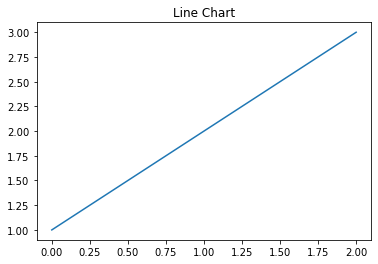

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

ax = pd.Series([1, 2, 3]).plot()
ax.set_title('Line Chart')
plt.show()

In [54]:
#스타일 변경
plt.style.use('ggplot')

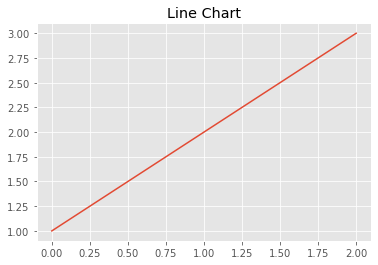

In [56]:
# Series에서 플롯하기
# 인덱스가 x값, 값(데이터)이 Y값이 된다

ser = pd.Series([1, 2, 3])
ax = ser.plot()
ax.set_title('Line Chart')
plt.show()

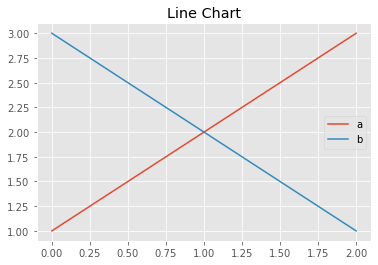

In [57]:
# DataFrame에서 플롯하기

df = pd.DataFrame({'a': [1, 2, 3], 'b':[3, 2, 1]})
ax = df.plot()
ax.set_title('Line Chart')
plt.show()

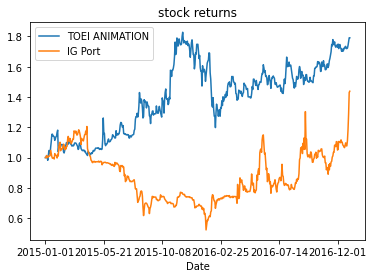

In [36]:
# 꺾은선 그래프 작성하기

import os

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_stock_returns_csv = os.path.join(base_url, 'anime_stock_returns.csv')
anime_stock_returns_df = pd.read_csv(anime_stock_returns_csv, index_col = 0)
ax = anime_stock_returns_df.plot()
ax.set_title('stock returns')
plt.show()

#### Y축 범위가 다른 경우
    plot() 메서드 키워드 인수 secondary_y에 두 번째 축이 되는 열 이름을 리스트 형으로 지정.

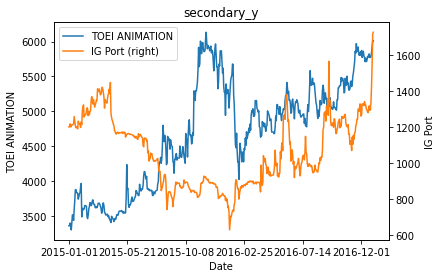

In [35]:
anime_stock_price_csv = os.path.join(base_url, 'anime_stock_price.csv')
anime_stock_price_df = pd.read_csv(anime_stock_price_csv, index_col=0)
ax = anime_stock_price_df.plot(secondary_y = ['IG Port'])
ax.set_title('secondary_y')
ax.set_ylabel('TOEI ANIMATION')
ax.right_ax.set_ylabel('IG Port')
plt.show()


#### 복수의 그림에 분할하는 방법
    plot() 메서드의 키워드 인수 subplots에 True를 설정

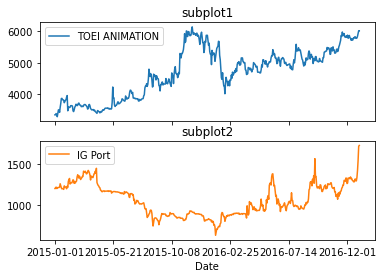

In [43]:
ax1, ax2 = anime_stock_price_df.plot(subplots=True)
ax1.set_title('subplot1')
ax2.set_title('subplot2')
plt.show()

### 산포도 그래프 작성하기
    plot.scatter() 메서드를 사용한다. 키워드 인수 x에 X값이 되는 열 이름, 키워드 인수 y에 Y 값이 되는 열 이름을 지정한다

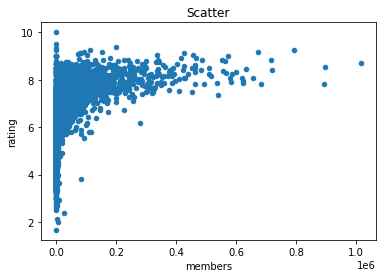

In [44]:
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
anime_master_df = pd.read_csv(anime_master_csv)
ax = anime_master_df.plot.scatter(x='members', y='rating')
ax.set_title('Scatter')
plt.show()

### 막대그래프 작성하기
    plot.bar() 메서드 활용

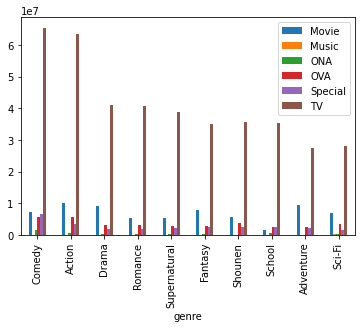

In [45]:
anime_genre_top10_pivoted_csv = os.path.join(base_url, 'anime_genre_top10_pivoted.csv')
anime_genre_top10_pivoted_df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col=0)
ax = anime_genre_top10_pivoted_df.plot.bar()
plt.show()

#### 로그축으로 변경하는 경우
    plot.bar() 메서드의 키워드 인수 logy에 True를 설정하면 Y축이 로그가 됨.
    legend() 메서드의 키워드 인수 bbox_to_anchor을 설정해 범례의 위치 조정 가능

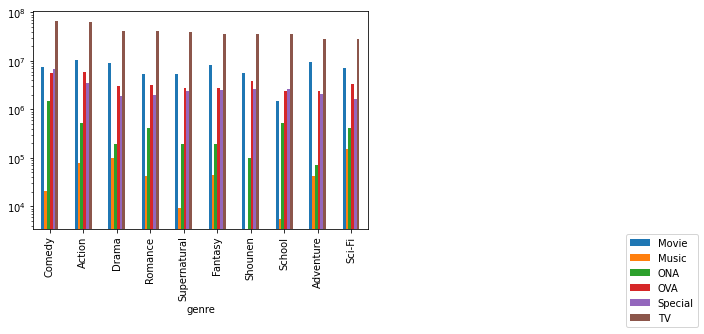

In [55]:
ax = anime_genre_top10_pivoted_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(2,0)) ##범례 위치 x, y
plt.show()

#### 누적 막대그래프로 하는 경우
    plot.bar() 메서드의 키워드 인수 stacked에 True를 설정

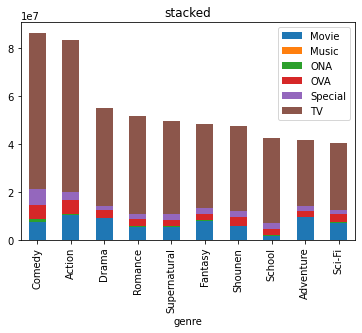

In [58]:
ax = anime_genre_top10_pivoted_df.plot.bar(stacked=True)
ax.set_title('stacked')
plt.show()

### 히스토그램 작성하기
    hist() 메서드를 사용함. 키워드 인수 bins에 정수값을 설정하여 막대 수를 변경

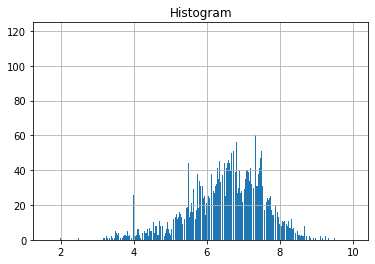

In [62]:
ax = anime_master_df['rating'].hist(bins=1000)
ax.set_title('Histogram')
plt.show()

### 상자수염 그래프 작성하기
    plot.box() 메서드를 사용한다

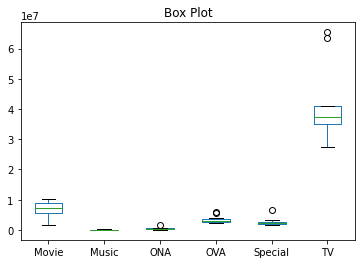

In [63]:
ax = anime_genre_top10_pivoted_df.plot.box()
ax.set_title('Box Plot')
plt.show()

### 원 그래프 작성하기
    plot.pie() 메서드 사용. 기본 설정에는 타원으로 그려지기 때문에 pie() 메서드의 키워드 인수 figsize에 그림의 사이즈를 지정함

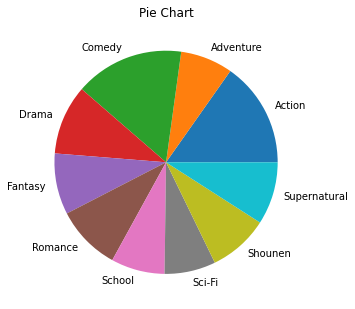

In [74]:
anime_genre_top10_csv = os.path.join(base_url, 'anime_genre_top10.csv')
anime_genre_top10_df = pd.read_csv(anime_genre_top10_csv)
ax = anime_genre_top10_df.groupby('genre').sum()['members'].plot.pie(figsize=(5, 6))
ax.set_title('Pie Chart')
ax.set_ylabel('') # Y축 레이블 삭제
plt.show()